In [1]:
from scipy import special

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-milovanov/olist_customers_dataset.csv')
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-milovanov/olist_orders_dataset.csv')
products = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-milovanov/olist_order_items_dataset.csv')

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**olist_customers_datase.csv**  — таблица с уникальными идентификаторами пользователей<br>
**customer_id** — позаказный идентификатор пользователя<br>
**customer_unique_id** —  уникальный идентификатор пользователя  (аналог номера паспорта)<br>
**customer_zip_code_prefix** —  почтовый индекс пользователя<br>
**customer_city** —  город доставки пользователя<br>
**customer_state** —  штат доставки пользователя

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**olist_orders_dataset.csv** —  таблица заказов<br> 
**order_id** —  уникальный идентификатор заказа (номер чека)<br> 
**customer_id** —  позаказный идентификатор пользователя<br> 
**order_status** —  статус заказа<br> 
**order_purchase_timestamp** —  время создания заказа<br> 
**order_approved_at** —  время подтверждения оплаты заказа<br> 
**order_delivered_carrier_date** —  время передачи заказа в логистическую службу<br> 
**order_delivered_customer_date** —  время доставки заказа<br> 
**order_estimated_delivery_date** —  обещанная дата доставки

In [6]:
products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**olist_order_items_dataset.csv** —  товарные позиции, входящие в заказы <br>
**order_id** —  уникальный идентификатор заказа (номер чека)<br>
**order_item_id** —  идентификатор товара внутри одного заказа<br>
**product_id** —  ид товара (аналог штрихкода)<br>
**seller_id** — ид производителя товара<br>
**shipping_limit_date** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике<br>
**price** —  цена за единицу товара<br>
**freight_value** —  вес товара<br>

In [7]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

В таблице **orders** есть пустые значения. В графах отвечающих за одобрение заказа и его доставку. Видимо - это отмененые заказы. Считаю, что удалять их не нужно, это не ошибка.

In [9]:
products.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)** 

In [10]:
customers['customer_id'].value_counts() 

700660b5eabe7b1914f0bde53b1f7d2d    1
370518eb3880e605c398910e3bb0aa85    1
bc6b9c888681765f177cacee35b6157d    1
319a71d1061c0bff9af2fd98eb3e8e14    1
d4f32ed4a4528ef7aa29aec2fc65eae1    1
                                   ..
05c0080971ea51d47c0bd869abebb1e5    1
43082d4044011b783b48cf02f3c7880c    1
98320c18e7b0f0ad33ae1283f6482237    1
e0d310f4721fef7575c5ec725b2e9b94    1
10804d267da5dd8c39b604a3a21bae90    1
Name: customer_id, Length: 99441, dtype: int64

In [11]:
customers['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
503360ad85d137a3aa40025f882517d5     1
b92521a4c53914658017fda4e09397ba     1
44dc680d8deb17f8d31ecc3ece879c0c     1
b413fd55cc9f2c8abeb60cde0b2e65ed     1
24c3223c7a70060b70168a0d8594c8a7     1
Name: customer_unique_id, Length: 96096, dtype: int64

Проанализировав данные таблицы **customers**, пришёл к выводу, что для дальнешего анализа необходимо применение столбца  **customer_unique_id**, т.к. под некоторыми **customer_id** одни и те же пользователи.

In [12]:
orders_customers = pd.merge(orders,customers[['customer_id','customer_unique_id']], on='customer_id', how='left')

In [13]:
orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


In [14]:
orders_customers['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Объединив две таблицы, смотрю какие статусы есть по заказам. Для данного задания, я думаю, подходят два статуса: **"delivered"** и **"shipped"**, т.к. статус "отгружен со склада" показывает, что пользователь уже совершил покупку и ожидает товар. Однако, на некоторые заказы со статусом  "отгружен со склада", проглядывается слишком большой интервал доставки (возможно заказ потерян или есть ошибка в данных). Использовать этот статус во избежания путаницы я не буду.

In [15]:
orders_customers_status= orders_customers.drop_duplicates(subset=['customer_unique_id'], keep=False).query('order_status=="delivered"')

In [16]:
orders_customers_status.customer_unique_id.value_counts().sum()

90379

Убираю повторяющиеся значения в **customer_unique_id**, оставляя только уникальные, фильтруя по статусу **"delivered"**.
И считаю их. 

Ответ: 90379 пользователя, которые совершили покупку только один раз.

**2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)**

In [17]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [18]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [19]:
products.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [20]:
orders_customers.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
customer_unique_id               object
dtype: object

In [21]:
orders['order_purchase_timestamp']=orders['order_purchase_timestamp'].astype('datetime64')
orders['order_approved_at']=orders['order_approved_at'].astype('datetime64')
orders['order_delivered_carrier_date']=orders['order_delivered_carrier_date'].astype('datetime64')
orders['order_delivered_customer_date']=orders['order_delivered_customer_date'].astype('datetime64')
orders['order_estimated_delivery_date']=orders['order_estimated_delivery_date'].astype('datetime64')

In [22]:
products['shipping_limit_date']=products['shipping_limit_date'].astype('datetime64')

In [23]:
orders_customers['order_purchase_timestamp']=orders['order_purchase_timestamp'].astype('datetime64')
orders_customers['order_approved_at']=orders['order_approved_at'].astype('datetime64')
orders_customers['order_delivered_carrier_date']=orders['order_delivered_carrier_date'].astype('datetime64')
orders_customers['order_delivered_customer_date']=orders['order_delivered_customer_date'].astype('datetime64')
orders_customers['order_estimated_delivery_date']=orders['order_estimated_delivery_date'].astype('datetime64')

Проверил формат колонок и обнаружил необходимость переформатирвоать часть колонок в формат даты

In [24]:
orders.sort_values('order_purchase_timestamp', ascending=False).head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
60938,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15


Смотрю какая дата времени создания заказа самая последняя в данной таблице. Это 2018-10-17.

In [25]:
orders.query('order_status == "shipped" and order_estimated_delivery_date<"2018-08-17"').sort_values('order_estimated_delivery_date')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
22948,3f913d30288c117e41ffe5cc74743dc9,7aae6b74d7e0a2a11051bf8a16e16021,shipped,2016-10-05 14:36:55,2016-10-06 15:53:06,2016-10-15 12:24:42,NaT,2016-11-29
23254,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaT,2016-12-01
47113,cda873529ca7ab71f677d5ec11a40304,76c74aaff2f3f7355f46d9818ad092b8,shipped,2016-10-05 16:57:30,2016-10-06 15:52:49,2016-11-14 11:14:39,NaT,2016-12-01
19523,063b573b88fc80e516aba87df524f809,285195a5b585842e25bd1ef9015a8413,shipped,2016-10-07 19:17:00,2016-10-07 19:29:20,2016-10-30 10:23:36,NaT,2016-12-01
...,...,...,...,...,...,...,...,...
44563,723fdebe8280ea74fca298382c4d7ac7,bb7a94644a9bd3b4116876c4a6380e1b,shipped,2018-08-12 21:51:12,2018-08-12 22:04:26,2018-08-13 15:19:00,NaT,2018-08-16
68057,03e5d6a8dd520898f86f8429ccd07c21,72b319c928f3d04322db2e904d91a611,shipped,2018-07-30 11:51:13,2018-07-31 12:31:25,2018-07-31 14:21:00,NaT,2018-08-16
68957,22f94104a2c1ac2af08122839aa708b2,528aaeab73d4582f7b8ee6c179db8fdd,shipped,2018-07-17 20:23:27,2018-07-19 03:02:30,2018-07-20 15:59:00,NaT,2018-08-16
40712,e03566eab6041e05274e23b5a2fe5d31,c5af5453cf8127f3c3ce75b498561dbc,shipped,2018-07-24 21:05:03,2018-07-24 21:24:30,2018-07-27 14:39:00,NaT,2018-08-16


Отфильтровал таблицу по тем заказам, которые отправлены, и должны были быть доставлены 2 месяца назад (от последней даты) или более. Два месяца беру из расчета того, что могут быть задержки с доставкой.
И получается из 1107 заказов со статусом "shipped" - 1061 заказов имеют большую проблему с доставкой, и их можно считать не доставленными.

Так же в список недосталенных заказов я включаю те, у которых статус "canceled" - 625 заказов и "unavailable" - 609 заказов

In [26]:
order_statuses = orders.groupby('order_status', as_index=False).agg({'order_id':'nunique'}).rename(columns={'order_id':'id'})

In [27]:
order_statuses.head()

,order_status,id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314


In [28]:
months = int((orders.order_purchase_timestamp.max() - orders.order_purchase_timestamp.min()).days) / 30

Нахожу количество месяцев за которые производится расчёт.

In [29]:
order_statuses['number_in_month'] = order_statuses['id'] / months

In [30]:
order_statuses.head()

,order_status,id,number_in_month
0,approved,2,0.077720
1,canceled,625,24.287565
2,created,5,0.194301
3,delivered,96478,3749.145078
4,invoiced,314,12.202073


Нахожу количество действий в месяц

In [31]:
order_statuses_not_delivered = order_statuses.query('order_status != "delivered"').sort_values('id', ascending=False).reset_index(drop=True)

In [32]:
order_statuses_not_delivered

,order_status,id,number_in_month
0,shipped,1107,43.018135
1,canceled,625,24.287565
2,unavailable,609,23.665803
3,invoiced,314,12.202073
4,processing,301,11.696891
5,created,5,0.194301
6,approved,2,0.077720


**3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)**

In [33]:
day_by_week = pd.merge(products,orders[['order_id','order_status','order_purchase_timestamp']],on='order_id', how='left')

Я считаю, что учитывать в данном задании надо товары из тех заказов, которые были доставлены - "delivered". И считать по дате создания заказа - ведь именно эта дата отображает спрос покупателя к конкретному товару в конкретный день, в то время как остальные даты - это даты работы с заказом внутри фирмы. Поэтому я соединил таблицы (к таблице товаров присоединил статус заказа и дату его создания).

In [34]:
day_by_week['Day_of_Week'] = day_by_week['order_purchase_timestamp'].dt.day_name()

Высчитываем по дате какой это был день недели

In [35]:
day_by_week

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,Day_of_Week
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,delivered,2017-09-13 08:59:02,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,delivered,2017-04-26 10:53:06,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,delivered,2018-01-14 14:33:31,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,delivered,2018-08-08 10:00:35,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,delivered,2017-02-04 13:57:51,Saturday
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,delivered,2018-04-23 13:57:06,Monday
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,delivered,2018-07-14 10:26:46,Saturday
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,delivered,2017-10-23 17:07:56,Monday
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,delivered,2017-08-14 23:02:59,Monday


In [36]:
day_by_week_max=day_by_week.query('order_status=="delivered"')\
    .groupby(['product_id','Day_of_Week'], as_index=False)\
    .agg({'order_item_id':'count'})\
    .sort_values('product_id')

Группирую данные, предварительно отсортировав выполненные заказы, и подсчитываю для каждого товара сколько он продавался в каждый день недели.

In [37]:
day_by_week_max=day_by_week_max.iloc[day_by_week_max.groupby('product_id')['order_item_id'].agg(pd.Series.idxmax)]

С помощью группировки и iloc нахожу какой день недели для каждого товара был самым популярным по заказам.

In [38]:
day_by_week_max

,product_id,Day_of_Week,order_item_id
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
...,...,...,...
59944,fff6177642830a9a94a0f2cba5e476d1,Saturday,1
59946,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
59947,fff9553ac224cec9d15d49f5a263411f,Friday,1
59949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1


In [39]:
day_by_week_max=day_by_week_max.rename(columns={"order_item_id":"count_orders"})
day_by_week_max.sort_values('count_orders', ascending=False)

,product_id,Day_of_Week,count_orders
15597,422879e10f46682990de24d770e7f83d,Wednesday,93
40183,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
12745,368c6c730842d78016ad823897a372db,Friday,67
49153,d1c427060a0f73f6b889a5c7c61f2ac4,Monday,62
35755,99a4788cb24856965c36a24e339b6058,Tuesday,59
...,...,...,...
22723,609b1b50202d276e56b2468006fa82aa,Friday,1
22722,6097eebec473cdb11826ddc1b331058e,Sunday,1
22721,60963bbf9e011d8eec21c515ff623fba,Monday,1
22720,609092e5b5c4a202878eb9ba03b47793,Sunday,1


**4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)** 

In [40]:
orders_customers.order_approved_at = pd.to_datetime(orders.order_approved_at, yearfirst=True)

In [41]:
orders_customers['order_approved_at'] = pd.to_datetime(orders.order_approved_at.dt.strftime('%Y-%m') + '-01', yearfirst=True)

Перевожу дату покупки к началу месяца

In [42]:
orders_is_purchase = orders_customers.query('order_status == "delivered"')

Новая таблица с заказами, где покупка состоялась

In [43]:
customer_orders_per_week = orders_is_purchase.groupby(by=['customer_unique_id', 'order_approved_at'], as_index=False).agg({'order_id':'count'}).rename(columns={'order_id':'purchases'})

Таблица с количеством покупок по пользователям и месяцам

In [44]:
customer_orders_per_week['weeks'] = customer_orders_per_week.order_approved_at.dt.daysinmonth.div(7)

Рассчитываю количество недель в месяце (weeks)

In [45]:
customer_orders_per_week['orders_per_week'] = customer_orders_per_week.purchases.div(customer_orders_per_week.weeks)

Рассчитываю количество покупок в неделю

**Ответ - Столько у каждого из пользователей в среднем покупок в неделю (по месяцам)**

In [46]:
customer_orders_per_week.sort_values(['customer_unique_id','order_approved_at']).head()

,customer_unique_id,order_approved_at,purchases,weeks,orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.285714,0.233333


**5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)**

In [47]:
orders_customers.sort_values('order_purchase_timestamp')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-01,2016-10-18 13:14:51,NaT,2016-10-20,b7d76e111c89f7ebf14761390f0f7d17
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-01,NaT,NaT,2016-10-28,4854e9b3feff728c13ee5fc7d1547e92
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-01,NaT,NaT,2016-09-30,009b0127b727ab0ba422f6d9604487c7
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-01,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,830d5b7aaa3b6f1e9ad63703bec97d23
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-01,NaT,NaT,2016-10-25,0eb1ee9dba87f5b36b4613a65074337c
...,...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,9bb92bebd4cb7511e1a02d5e50bc4655
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,634420a0ea42302205032ed44ac7fccc
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,af5454198a97379394cacf676e1e96cb
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,262e1f1e26e92e86375f86840b4ffd63


Нахожу дату первых покупок для каждого пользователя, используя уже ранее смердженую таблицу заказов и уникальных id

In [48]:
first_orders = orders_customers.groupby('customer_unique_id', as_index=False).agg({'order_purchase_timestamp': 'min'})
first_orders.head()

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


Объединяю таблицу заказов (с уникальными id) и полученные даты первых покупок

In [49]:
df_ord=pd.merge(orders_customers,first_orders[['customer_unique_id','order_purchase_timestamp']], on='customer_unique_id', how='left')

In [50]:
df_ord=df_ord.rename(columns={'order_purchase_timestamp_y':'first_order'})

 Для удобства переименовываю колонку

In [51]:
df_ord["year_m_first_ord"] = df_ord["first_order"].dt.to_period("M")

In [52]:
df_ord["year_m_ord"] = df_ord["order_purchase_timestamp_x"].dt.to_period("M")

Вывожу значения только (год.месяц) для первого заказа и для всех заказов отдельно

In [53]:
df_ord_grup=df_ord.query('order_status !="unavailable" and order_status !="canceled" and year_m_first_ord>="2017-01" and year_m_first_ord<="2018-03" and year_m_ord<"2018-06"')\
    .groupby(['year_m_first_ord', 'year_m_ord'], as_index=False)\
    .agg({'customer_unique_id':'nunique'})\
    .sort_values(by=['year_m_first_ord','year_m_ord'])
df_ord_grup=df_ord_grup.rename(columns={'order_status':'count_orders'})

Далее я группирую по обеим датам, исключив с помощью query статусы "unavailable" и "canceled", т.к. это отмененные и недоступные заказы.

In [54]:
df_ord_grup

,year_m_first_ord,year_m_ord,customer_unique_id
0,2017-01,2017-01,752
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
144,2018-02,2018-04,25
145,2018-02,2018-05,19
146,2018-03,2018-03,6929
147,2018-03,2018-04,31


In [55]:
df_ord_cog=df_ord_grup.pivot(index = 'year_m_first_ord', columns = 'year_m_ord', values = 'customer_unique_id')

In [56]:
df_ord_cog

year_m_ord,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
year_m_first_ord,,,,,,,,,,,,,,,,,
2017-01,752.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0
2017-02,NaN,1690.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0
2017-03,NaN,NaN,2571.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,3.0,6.0,3.0,4.0
2017-04,NaN,NaN,NaN,2325.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0
2017-05,NaN,NaN,NaN,NaN,3541.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,9.0,9.0,12.0,9.0
2017-06,NaN,NaN,NaN,NaN,NaN,3101.0,15.0,11.0,12.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,10.0
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,3820.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4129.0,29.0,14.0,11.0,15.0,22.0,12.0,11.0,6.0,6.0
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4073.0,28.0,22.0,12.0,18.0,9.0,9.0,10.0,12.0


С помощью функции pivot делаю сводную таблицу.

In [57]:
x=df_ord_grup['year_m_first_ord'].sort_values().unique()
y=df_ord_grup['year_m_ord'].sort_values().unique()
df_con=pd.DataFrame()
for i in range (len (x)):
    df_x=df_ord_grup.query('year_m_first_ord==@x[@i] and year_m_ord==@y[@i+2]')
    df_con=pd.concat([df_con,df_x])

In [58]:
df_con

,year_m_first_ord,year_m_ord,customer_unique_id
2,2017-01,2017-03,2
18,2017-02,2017-04,5
34,2017-03,2017-05,9
49,2017-04,2017-06,5
63,2017-05,2017-07,18
76,2017-06,2017-08,11
88,2017-07,2017-09,14
99,2017-08,2017-10,14
109,2017-09,2017-11,22
118,2017-10,2017-12,11


In [59]:
df_con[df_con['customer_unique_id'] ==df_con['customer_unique_id']. max ()]

,year_m_first_ord,year_m_ord,customer_unique_id
126,2017-11,2018-01,28


Ответ: когорта 2017 года с самым высоким retention на 3й месяц - это "2017-11" 

**6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)**

In [60]:
duplicate_product_price=products.groupby(['product_id','price'], as_index=False).agg({'order_id':'count'}).sort_values('product_id')
ids = duplicate_product_price["product_id"]

In [61]:
duplicate_product_price[ids.isin(ids[ids.duplicated()])].sort_values("product_id")

,product_id,price,order_id
11,00210e41887c2a8ef9f791ebc780cc36,32.98,4
12,00210e41887c2a8ef9f791ebc780cc36,33.99,3
13,002159fe700ed3521f46cfcf6e941c76,199.70,7
14,002159fe700ed3521f46cfcf6e941c76,220.70,1
16,00250175f79f584c14ab5cecd80553cd,54.99,2
...,...,...,...
42397,fff0a542c3c62682f23305214eaeaa24,7.50,7
42401,fff6177642830a9a94a0f2cba5e476d1,109.99,1
42402,fff6177642830a9a94a0f2cba5e476d1,119.99,1
42406,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,4


Перед началом подсчетов решил проверить, не меняется ли число в графе "price" для одного и того же товара. Создаю новую таблицу, где группирую колонки по полю 'product_id' и 'price', а после вывожу только дублирующиеся product_id.

По результатам видно, что для одних и тех же товаров встречется разный прайс, а так как других колонок в таблице товара нет, которые бы отображали количество или общую сумму, отдельно от прайса, то я буду считать колонку "price" как общую сумму, заплаченную за товар в конкретном заказе, а не цену за 1 единицу товара.

In [62]:
ord_sum=products.groupby(['order_id'], as_index=False).agg({'price':'sum'})
ord_sum.head(3)

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.9
1,00018f77f2f0320c557190d7a144bdd3,239.9
2,000229ec398224ef6ca0657da4fc703e,199.0


Суммирую для каждого заказа колонку "price", что бы вычислить сумму заказа.

In [63]:
last_orders = orders_customers.groupby('customer_unique_id', as_index=False).agg({'order_purchase_timestamp': 'max'}).rename(columns={'order_purchase_timestamp':'last_orders'})
last_orders.head()

,customer_unique_id,last_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


Вывожу данные о последнем заказе для каждого уникального пользователя.

In [64]:
df_ord_sum=pd.merge(df_ord,last_orders[['customer_unique_id','last_orders']], on='customer_unique_id', how='left')
df_ord_sum=pd.merge(df_ord_sum,ord_sum[['order_id','price']], on='order_id', how='left')

Объединяю полученные данные о последнем заказе и прайсе для заказа с таблицей, уже ранее созданной.

In [65]:
df_ord_sum.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp_x,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,first_order,year_m_first_ord,year_m_ord,last_orders,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-01,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38,2017-09,2017-10,2017-10-02 10:56:33,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-01,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07,2018-07-24 20:41:37,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-01,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08,2018-08-08 08:38:49,159.90


In [66]:
print('Orders from {} to {}'.format(df_ord_sum['order_purchase_timestamp_x'].min(),
                                    df_ord_sum['order_purchase_timestamp_x'].max()))

Orders from 2016-09-04 21:15:19 to 2018-10-17 17:30:18


Смотрю на максимальные и минимальные даты для заказов.

In [67]:
NOW = df_ord_sum['order_purchase_timestamp_x'].max() 
NOW

Timestamp('2018-10-17 17:30:18')

Последний заказ сделан "2018-10-17", будем это считать датой получения актуальных данных и "последнюю дату" буду расчитывать исходя из "2018-10-17". А так как в задании написано, что "F - суммарное количество покупок у пользователя за всё время" - то стартовую дату я беру "2016-09-04"

In [68]:
df_ord_sum['DaysSinceOrder'] = df_ord_sum['last_orders'].apply(lambda x: (NOW - x).days)

In [69]:
df_ord_sum.query('customer_unique_id == "7c396fd4830fd04220f754e42b4e5bff"')

,order_id,customer_id,order_status,order_purchase_timestamp_x,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,first_order,year_m_first_ord,year_m_ord,last_orders,price,DaysSinceOrder
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-01,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38,2017-09,2017-10,2017-10-02 10:56:33,29.99,380
62147,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-01,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:26:38,2017-09,2017-09,2017-10-02 10:56:33,35.39,380


Проверяю, что количество дней от последнего заказа везде поставилось одинаково.

In [70]:
df_RFM=df_ord_sum.query('order_status !="unavailable" and order_status !="canceled"')\
    .groupby(['customer_unique_id','DaysSinceOrder'], as_index=False)\
    .agg({'order_status':'count','price':'sum'})\
    .rename(columns={'order_status':'Frequency','DaysSinceOrder':'Recency_days','price':'Monetary'})
df_RFM.head(3)

,customer_unique_id,Recency_days,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.9
2,0000f46a3911fa3c0805444483337064,585,1,69.0


In [71]:
df_RFM

,customer_unique_id,Recency_days,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90
2,0000f46a3911fa3c0805444483337064,585,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00
...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,495,1,1570.00
94986,fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89
94987,ffff371b4d645b6ecea244b27531430a,617,1,89.90
94988,ffff5962728ec6157033ef9805bacc48,168,1,115.00


Группирую таблицу по дням с последнего заказа, количеству заказов и сумме.

In [72]:
quintiles = df_RFM[['Recency_days', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency_days': {0.2: 141.0, 0.4: 226.0, 0.6: 317.0, 0.8: 432.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

Смотрю квантили для колонок 'Recency_days', 'Frequency' и 'Monetary'.

In [73]:
print(16*0.3,'     ',16*0.6)

4.8       9.6


Я выбрал 30% и 60% от максимального количества заказов для разбивки Frequency

In [74]:
bin_labels = ['1', '2', '3', '4', '5']
bin_labels_2 = ['1', '2', '3']
bin_labels_3 = ['5', '4', '3', '2', '1']
cut_bins = [0, 4.8, 9.6, 16]

В Recency_days - 20% квантиль - 141, следовательно, исходя из такой логики - все покупки за последние 141 день (а это больше, чем 4 месяца) - попадут в группу как "недавние". Меня смущает такой длинный временной интервал. Однако,я не уверен, можно ли смещать и разбивать группы не равномерно. Но у нас максимальная дата последней покупки - 773 дня, а это 2 года! Временные интервалы очень большие, и все, что дальше 20%-ного квантиля - уже можно назвать "давней" покупкой. Однако нам не известен сам товар, его специфика, возможно это очень уникальный не часто используемый товар и его обновление требуется очень редко, поэтому я не буду устанавливать свои рамки для "Recency_days".

Разбиваю каждую группу для будущего сигментирования на категории от 1 до 5, а в случае с Frequency - до 3-х.

In [75]:
df_RFM['R'] = pd.qcut(df_RFM['Recency_days'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_3)
df_RFM['F'] = pd.cut(df_RFM['Frequency'],
                       bins=cut_bins,
                       labels=bin_labels_2)
df_RFM['M'] = pd.qcut(df_RFM['Monetary'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels)

In [76]:
df_RFM['RFM_Score'] = df_RFM['R'].astype(str) +''+ df_RFM['F'].astype(str) +''+ df_RFM['M'].astype(str)

df_RFM.head()

,customer_unique_id,Recency_days,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,585,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00,2,1,5,215


Соединяю получившийся результат в отдельной колонке

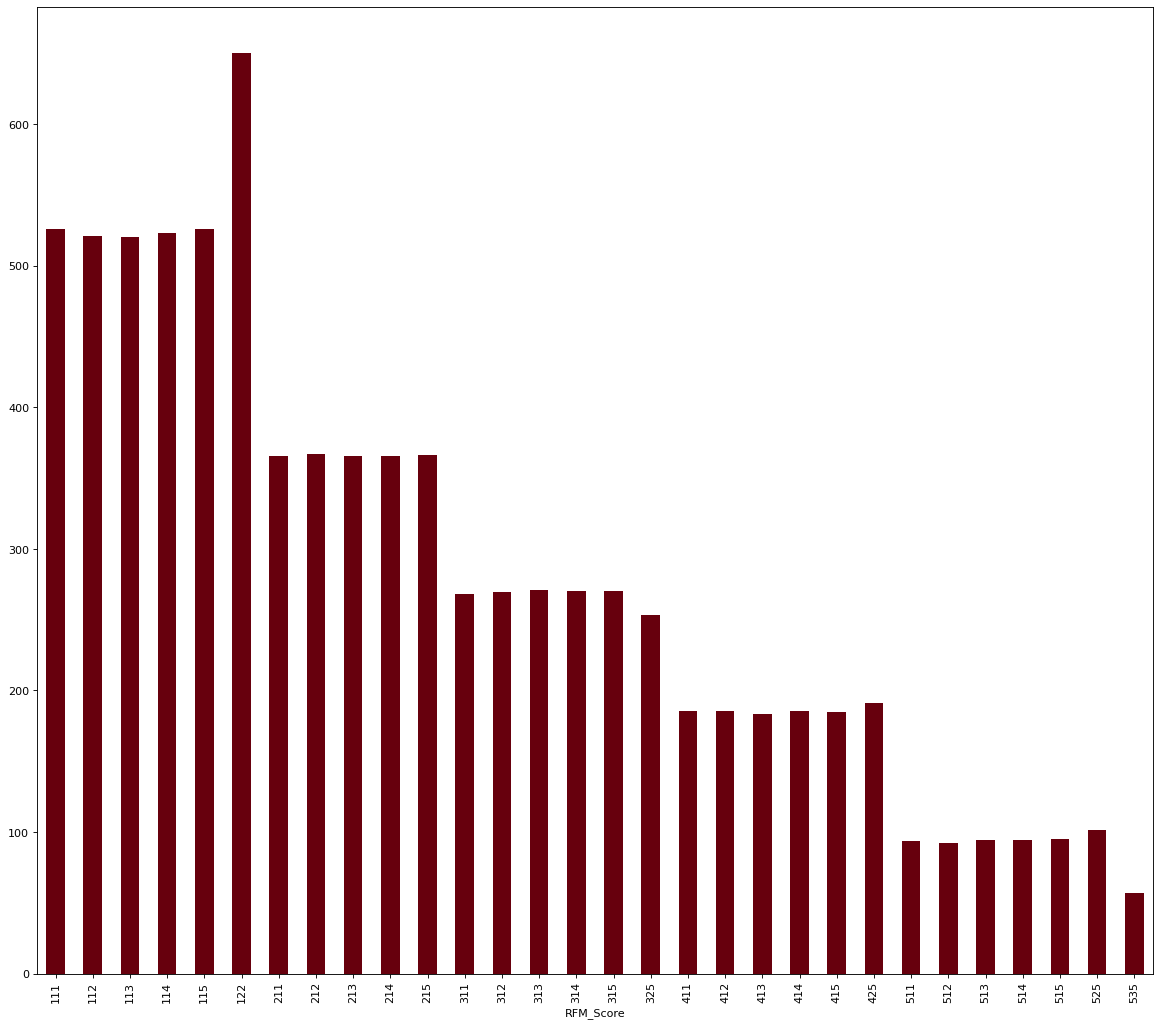

In [77]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df_RFM.groupby('RFM_Score').agg('Recency_days').mean().plot(kind='bar', colormap='Reds_r')
plt.show()

Для наглядности делаю визуализацию.

In [78]:
segt_map = {
    r'[1-2]1': 'longtime',
    r'[1-2]2': 'at risk',
    r'[1-2]3': 'can\'t loose',
    r'31': 'sleep',
    r'32': 'need attention',
    r'[3-4]3': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5]2': 'potential loyalists',
    r'53': 'lider'
}

df_RFM['Segment'] = df_RFM['R'].astype(str) + df_RFM['F'].astype(str)
df_RFM['Segment'] = df_RFM['Segment'].replace(segt_map, regex=True)

**R**:
5- Недавние;
4, 3 - Спящие;
2, 1 - Давние;
**F**:
1 - Очень редкие, могут быть разовые;
2 - Редкие;
3 - Частые;
**M**:
5 - Высокий чек;
4, 3 - Средний чек;
2, 1 - Низкий чек. 

Записываю какие числа, что обозначают в какой колонке и дальше провожу сигментацию по полученным данным.

In [79]:
df_RFM.sort_values('F')

,customer_unique_id,Recency_days,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,129.90,4,1,4,414,promising
63327,aa675da7689d6205d9821104b41ae2fe,338,1,58.99,2,1,2,212,longtime
63326,aa67457bb07fde4e952d67b038135bee,487,1,56.99,1,1,2,112,longtime
63325,aa671b18d12bf808c52e3ce9875dd8c6,63,1,229.90,5,1,5,515,new customers
63324,aa6516338ac54be60781a6fefac18e05,354,1,36.98,2,1,1,211,longtime
...,...,...,...,...,...,...,...,...,...
23201,3e43e6105506432c953e165fb2acf44c,231,9,1000.85,3,2,5,325,need attention
43442,74cb1ad7e6d5674325c1f99b5ea30d82,197,5,334.50,4,2,5,425,potential loyalists
7091,12f5d6e1cbf93dafd9dcc19095df0b3d,650,6,58.40,1,2,2,122,at risk
20115,35ecdf6858edc6427223b64804cf028e,199,5,393.86,4,2,5,425,potential loyalists


In [80]:
df_RFM['Segment'].value_counts()

longtime               37768
promising              19139
new customers          19042
sleep                  19022
potential loyalists       13
need attention             4
at risk                    1
lider                      1
Name: Segment, dtype: int64

Смотрю сколько раз встречается какой сегмент. "Лидер" у нас всего один, да и потенциальных лояльных клиентов не очень много.

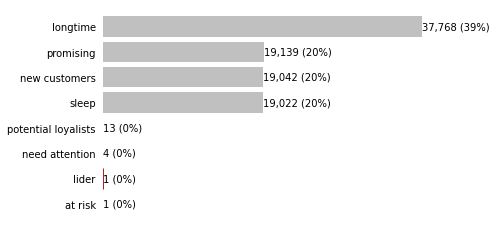

In [81]:
segments_counts = df_RFM['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['lider', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Вывод - повторных заказов очень мало, большинство клиентов оформляет разовые покупки. Большие упущенные возможности для увеличения прибыли. Очень много заказов имеют статус "отгружен со склада" с достаточно давней датой, т.е. это потерянные заказы. Потерянные заказы = потерянные клиенты и потерянные деньги в будущем, а возможно и в настоящем, если клиент требует возврата средств. Много пунктов для дальнейшей работы:
1)посмотреть качество товара - возможно, клиенты не возвращаются из-за неудовлетворительного качетва;
2)можно попробовать получить обратную связь у клиентов, у которых доставка дошла до адресата;
3)разобраться, почему так много заказов не добирается до клиента, возможно сменить фирму, которая обеспечивает логистику.
Дальше заниматься удержанием клиентов, исходя из сделанных выводов.